<a href="https://colab.research.google.com/github/Traversal2021/All4WashWebpage/blob/main/ML_assignmentv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install shap
!pip install catboost

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import catboost
from catboost import CatBoostRegressor,Pool


plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 11.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 15 kB/s 


In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/merged_data_v2.csv')
df.head()

,Country,Code,Year,gdp,hdi,Number of maternal deaths,Unemployment,UrbanRatio,RuralRatio,Population,MedianAge,FertilityRate,suicideRate
0,Afghanistan,AFG,2002,1189.784668,0.373,14000.0,11.257,0.22261,0.77739,21000258.0,14.0,7.3394,8.466522
1,Afghanistan,AFG,2003,1235.810059,0.383,14000.0,11.141,0.22353,0.77647,22645136.0,14.0,7.2199,8.368980
2,Afghanistan,AFG,2004,1200.277954,0.398,13000.0,10.988,0.22500,0.77500,23553554.0,14.0,7.0686,8.324784
3,Afghanistan,AFG,2005,1286.793701,0.408,13000.0,11.217,0.22703,0.77297,24411196.0,14.2,6.9047,8.122661
4,Afghanistan,AFG,2006,1315.789062,0.417,13000.0,11.099,0.22907,0.77093,25442946.0,14.3,6.7215,7.952673


In [8]:

df = df.rename(columns={
    'Number of maternal deaths': 'Maternal deaths'
})
df.describe()

,Year,gdp,hdi,Maternal deaths,Unemployment,UrbanRatio,RuralRatio,Population,MedianAge,FertilityRate,suicideRate
count,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000,3.014000e+03,3014.000000,3014.000000,3014.000000
mean,2008.618115,18216.044727,0.672503,2030.928003,8.112638,0.557761,0.442239,3.978671e+07,26.412840,2.987582,11.357681
std,5.161560,19874.113571,0.163136,7471.633916,6.270884,0.227942,0.227942,1.431117e+08,8.598507,1.563621,7.322270
min,2000.000000,630.701599,0.252000,0.000000,0.140000,0.082460,0.000000,1.026200e+05,13.800000,0.954200,2.040742
25%,2004.000000,3881.264648,0.541250,8.000000,3.793000,0.365413,0.259650,2.855407e+06,18.500000,1.735200,6.053481
50%,2009.000000,10677.453613,0.696000,88.000000,6.325000,0.563870,0.436130,8.517897e+06,24.600000,2.473450,9.955017
75%,2013.000000,26003.955566,0.799750,1000.000000,10.478000,0.740350,0.634587,2.745592e+07,34.599998,4.097600,14.112409
max,2017.000000,120647.820312,0.953000,103000.000000,37.250000,1.000000,0.917540,1.410276e+09,46.700001,7.731700,46.252150


In [9]:
# normalize data
list = ['gdp', 'hdi',
       'Maternal deaths', 'Unemployment', 'UrbanRatio', 'RuralRatio',
       'Population', 'MedianAge', 'FertilityRate','suicideRate']

for i in range(len(list)):
  df[list[i]] = MinMaxScaler().fit_transform(df[list[i]].values.reshape(-1,1))

**Feature selection**

In [ ]:
features = df.columns
features=features.drop("suicideRate")

categorical_features = np.where((df[features].dtypes.all() != [float, int]))[0]


X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df[['suicideRate']], 
                                                    test_size=0.3, 
                                                     random_state=1)
 
params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':categorical_features,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostRegressor(**params)
print(cat_model)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6989368	best: 0.6989368 (0)	total: 47.6ms	remaining: 3m 58s
200:	test: 0.7360082	best: 0.7360082 (200)	total: 268ms	remaining: 6.39s
400:	test: 0.7395782	best: 0.7395782 (400)	total: 496ms	remaining: 5.69s
600:	test: 0.7429891	best: 0.7429891 (600)	total: 729ms	remaining: 5.34s
800:	test: 0.7451024	best: 0.7451024 (800)	total: 1.06s	remaining: 5.57s
1000:	test: 0.7462380	best: 0.7462380 (1000)	total: 1.36s	remaining: 5.43s
1200:	test: 0.7470713	best: 0.7470745 (1199)	total: 1.59s	remaining: 5.03s
1400:	test: 0.7478265	best: 0.7478280 (1399)	total: 1.82s	remaining: 4.69s
1600:	test: 0.7483801	best: 0.7483827 (1599)	total: 2.13s	remaining: 4.53s
1800:	test: 0.7489734	best: 0.7489734 (1800)	total: 2.35s	remaining: 4.18s
2000:	test: 0.7493846	best: 0.7493846 (2000)	total: 2.59s	remaining: 3.88s
2200:	test: 0.7498095	best: 0.7498095 (2200)	total: 2.83s	remaining: 3.6s
2400:	test: 0.7501796	best: 0.7501796 (2400)	total: 3.17s	remaining: 3.43s
2600:	test: 0.7505774	best: 0.7505774 

In [ ]:
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

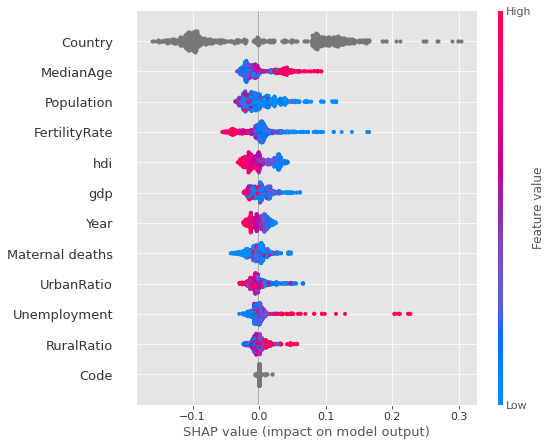

In [ ]:
shap.summary_plot(shap_values, X_test)

**Machine learning algorithm**

In [ ]:
# split dataset
y= df['suicideRate']
df_1=df[["gdp","hdi","Population","MedianAge","FertilityRate"]]

x_train, x_test, y_train, y_test = train_test_split(df_1, y, test_size=0.33, random_state=17)

multivariant linear regression

In [ ]:
x_linear = x_train
y_linear = y_train
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_linear, y_linear)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_linear = sm.add_constant(x_linear) # adding a constant
 
model_linear = sm.OLS(y_linear, x_linear).fit()

# with statsmodels
x_test_linear = sm.add_constant(x_test) # adding a constant
y_linear_predicted = model_linear.predict(x_test_linear)

mse = mean_squared_error(y_test,y_linear_predicted)
print('linear regression model mse: ',mse)

print_model = model_linear.summary()
print(print_model)




Intercept: 
 0.34092964439340223
Coefficients: 
 [-0.06457146 -0.41810451 -0.0625137   0.37124601 -0.02971567]
linear regression model mse:  0.022118861745294132
                            OLS Regression Results                            
Dep. Variable:            suicideRate   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     41.39
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.16e-40
Time:                        10:18:16   Log-Likelihood:                 823.70
No. Observations:                2019   AIC:                            -1635.
Df Residuals:                    2013   BIC:                            -1602.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t  

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


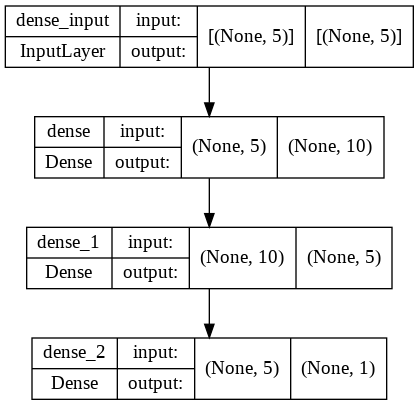

In [ ]:
# Import Keras modules


# build your first Multilayer Perceptron (MLP)
model = Sequential([
    layers.Dense(10, activation='relu', input_shape=[5]),
    layers.Dense(5, activation='relu'),
    layers.Dense(1,input_shape=[5])   #  By default, activation function is set to None. That means that by default it is a linear activation.
])
model.compile(optimizer='RMSprop', loss='mse', metrics=['mse','mae','accuracy'])

import tensorflow as tf
# visualize your model
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
# train your model
history = model.fit(x_train, y_train, epochs=300, validation_split=0.2, batch_size=1024, verbose=1)
y_predicted = model.predict(x_test)
mse = mean_squared_error(y_test,y_predicted)

 MPL model mse:  0.02024195718166948


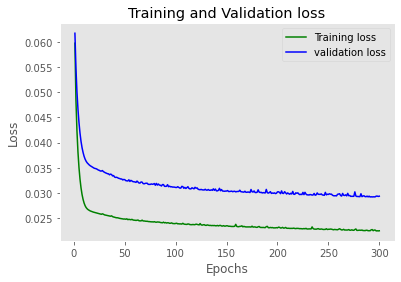

In [ ]:
print(' MPL model mse: ',mse)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,301)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes = (10,5,1), activation = 'relu', max_iter = 300, random_state= 17 )



scores = cross_validate(model, df_1, y, cv=3, scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],)
print('mean square value of cross validation: ', -scores['test_neg_mean_squared_error'].mean() )


mean square value of cross validation:  0.028060028450475945


In [ ]:
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
mlp_mse = mean_squared_error(y_test,y_predicted)
print('mean squared value of MLP: ',mlp_mse)

mean squared value of MLP:  0.020283410188584716


**Data visualization**

In [12]:
# RawData=pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/data.csv")
# Suicide_Values=RawData[["Location","ParentLocation","SpatialDimValueCode","Period","Dim1","FactValueNumeric"]]
# Suicide_Values.rename(columns={"Location": "Country","SpatialDimValueCode":"CountryCode", "ParentLocation": "Continental",
#                                "Dim1": "Gender", "FactValueNumeric": "StandValue"},inplace=True)
# BothSex=Suicide_Values[Suicide_Values["Gender"]=="Both sexes"]
# BothSex["MaxMinScale"]=MinMaxScaler().fit_transform(BothSex['StandValue'].values.reshape(-1,1))
# BothSex.sort_values(by=['Period'],inplace=True)
# BothSex.reset_index(drop=True, inplace=True)
df.sort_values(by=['Year'], inplace = True)

fig = px.choropleth(df, locations="Code", color="suicideRate", hover_name="Country", animation_frame="Year", range_color=[0,1])
#fig = px.choropleth(BothSex[BothSex["Period"]==2000], locations="CountryCode", color="MaxMinScale", hover_name="Country", animation_frame="Period", range_color=[0,1])
fig.show()

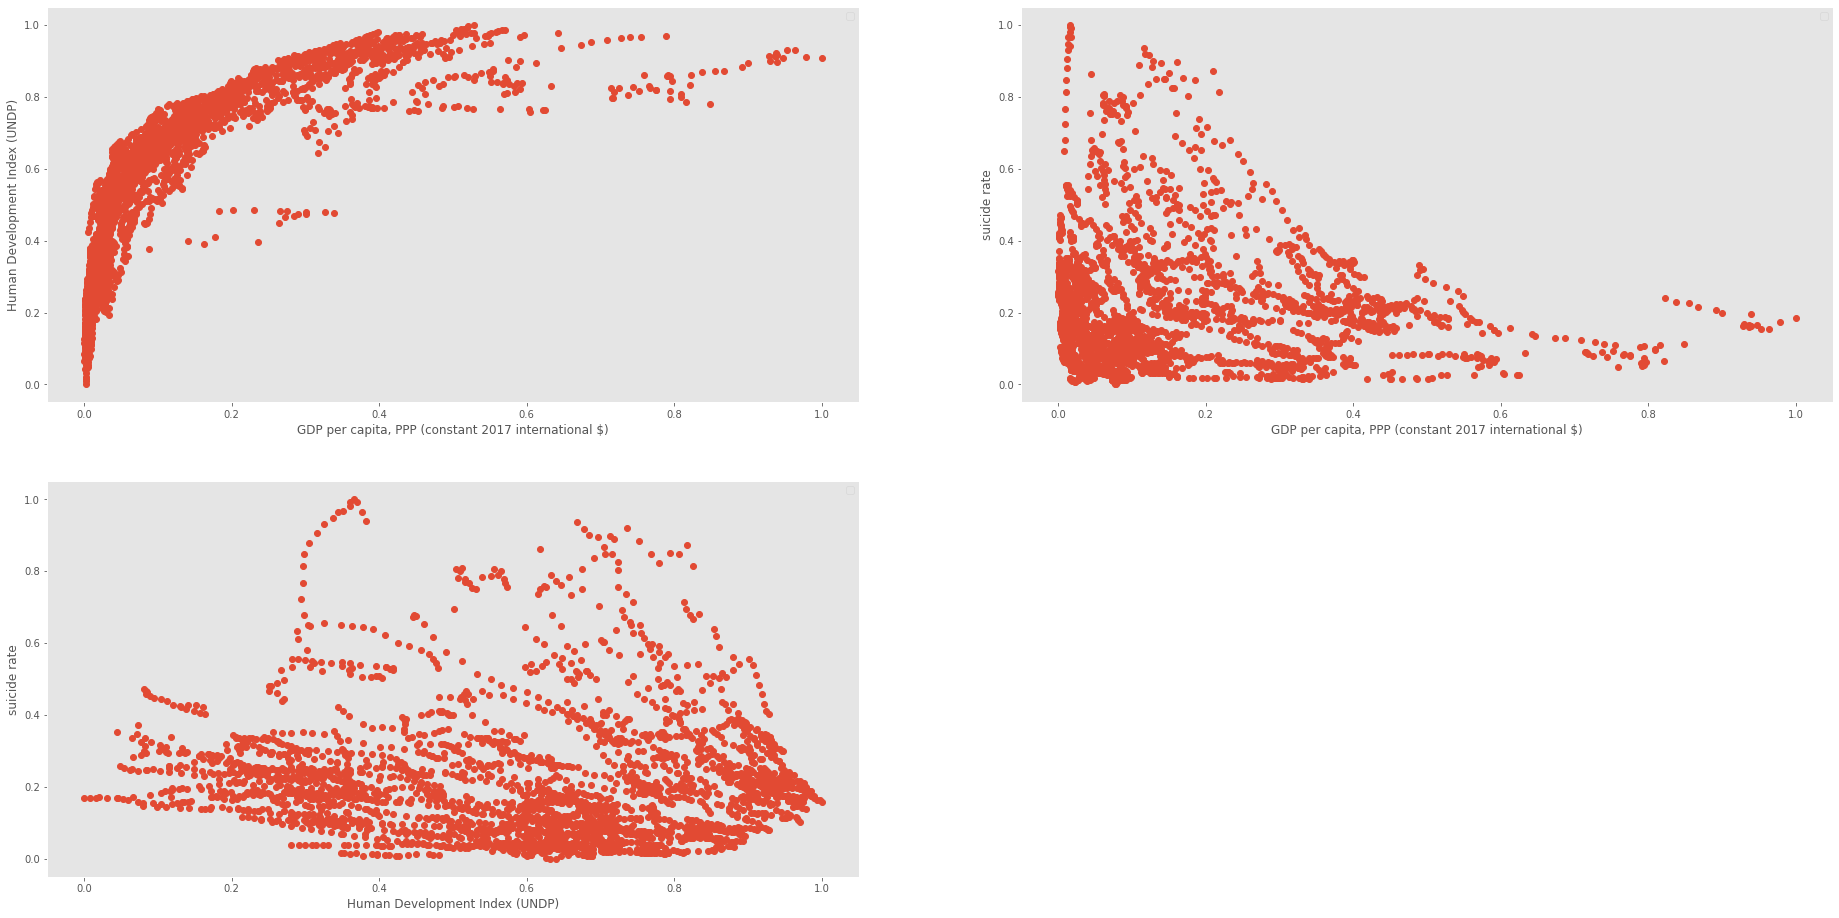

In [ ]:
# time series plot for USA, Norway, Turkey and China

plt.figure(figsize=(32,16))

plt.subplot(2,2,1)
plt.plot(df['gdp'], df['hdi'],linestyle='none', marker='o')
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Human Development Index (UNDP)')
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.plot(df['gdp'], df['suicideRate'],linestyle='none', marker='o')
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('suicide rate')
plt.grid()
plt.legend()

plt.subplot(2,2,3)
plt.plot(df['hdi'], df['suicideRate'],linestyle='none', marker='o')
plt.xlabel('Human Development Index (UNDP)')
plt.ylabel('suicide rate')
plt.grid()
plt.legend()

plt.show()